# Substitution Encryption

In the following notebook, we will encrypt and decrypt an image using the substitution algorithm. `ChaoticEncryption.jl`, internally, `XORs` each pixel with the provided key and replaces or substitues it in the position of original pixel. The API documentation for `ChaoticEncryption.jl` is available here - https://saransh-cpp.github.io/ChaoticEncryption.jl.

Let us start by adding in the julia packages we will be needing -

In [1]:
using Pkg
Pkg.add("TestImages")
# Not available on JuliaHub right now, refer to https://github.com/Saransh-cpp/ChaoticEncryption.jl#installation for installation.
# Pkg.add("ChaoticEncryption")

   Updating registry at `C:\Users\Saransh\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\Saransh\.julia\dev\ChaoticEncryption\Project.toml`
No Changes to `C:\Users\Saransh\.julia\dev\ChaoticEncryption\Manifest.toml`


In [2]:
using Images
using TestImages
using ChaoticEncryption

┌ Info: Precompiling ChaoticEncryption [8967581b-3fa7-4a60-bbed-8fff548a82df]
└ @ Base loading.jl:1278


## Generating keys

The first step in the process of encryption would be to generate the required number of keys. This can be done using the PRNGs available in `ChaoticEncryption.jl`. A detailed example describing the `Pseudo-Random Number Generators` available in `ChaoticEncryption.jl` is available [here](https://github.com/Saransh-cpp/ChaoticEncryption.jl/blob/master/examples/PseudoRandomNumberGenerators.ipynb).

Let's load up an image using `TestImages` package!

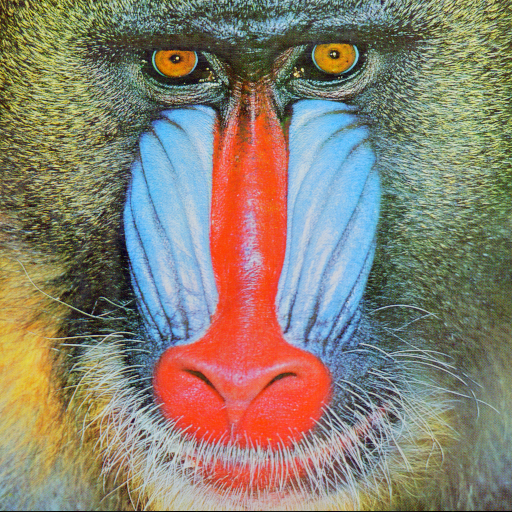

In [3]:
img = testimage("mandrill")

Next, let us retrieve the dimensions of the image 

In [4]:
height, width = size(img)

(512, 512)

Now we can use these dimensions to generate random keys!

In [5]:
key = logistic_key(0.01, 3.67, height * width)

262144-element Array{Int64,1}:
   0
  68
 135
  20
  13
 140
 197
 182
 248
 229
  29
 144
  97
   ⋮
  14
  27
  67
 168
 182
  77
  83
  74
 176
  27
 251
 206

## Encryption

Now we can proceed ahead and encrypt our images using the substitution algorithm! `ChaoticEncryption.jl` provides an elegant way to perform this algorithm using the function `substitution_encryption`.

The first step (as always) would be to look at the documentation, or the docstring, of `substitution_encryption`. 

In [6]:
?(substitution_encryption)

search: substitution_encryption



```
substitution_encryption(image, keys, path_for_result="./encrypted.png")
```

Performs substitution encryption on a given image with the given keys.

# Algorithm

Iterates simulataneously over each pixel and key, and XORs the pixel value (all R, G, and B) with the given key. Hence, the order of the keys matter.

# Arguments

  * `image::Array{RGB{N0f8},2}`: A loaded image.
  * `keys::Array{Int64, 1}`: Keys for encryption.
  * `path_for_result::String`: The path for storing the encrypted image.

# Returns

  * `encryptedImage::Array{RGB{N0f8}, 2}`: Encrypted image.

# Example

```julia-repl
julia> using Images, ChaoticEncryption

julia> img = load("path/to/image.png")
225×225 Array{RGB{N0f8},2} with eltype RGB{Normed{UInt8,8}}:
 RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.612,0.612,0.612)  …  RGB{N0f8}(0.133,0.133,0.133)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.612,0.612,0.612)     RGB{N0f8}(0.133,0.133,0.133)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.612,0.612,0.612)     RGB{N0f8}(0.129,0.129,0.129)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.612,0.612,0.612)     RGB{N0f8}(0.125,0.125,0.125)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.612,0.612,0.612)     RGB{N0f8}(0.122,0.122,0.122)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.612,0.612,0.612)  …  RGB{N0f8}(0.118,0.118,0.118)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.612,0.612,0.612)     RGB{N0f8}(0.114,0.114,0.114)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.612,0.612,0.612)     RGB{N0f8}(0.114,0.114,0.114)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.612,0.612,0.612)     RGB{N0f8}(0.122,0.122,0.122)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.608,0.608,0.608)  RGB{N0f8}(0.612,0.612,0.612)     RGB{N0f8}(0.125,0.125,0.125)  RGB{N0f8}(0.0,0.0,0.0)       
 ⋮                                                                                         ⋱
 RGB{N0f8}(0.4,0.4,0.4)        RGB{N0f8}(0.416,0.416,0.416)  RGB{N0f8}(0.447,0.447,0.447)     RGB{N0f8}(0.082,0.082,0.082)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.447,0.447,0.447)  RGB{N0f8}(0.467,0.467,0.467)  RGB{N0f8}(0.498,0.498,0.498)     RGB{N0f8}(0.102,0.102,0.102)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.431,0.431,0.431)  RGB{N0f8}(0.427,0.427,0.427)  RGB{N0f8}(0.447,0.447,0.447)     RGB{N0f8}(0.086,0.086,0.086)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.451,0.451,0.451)  RGB{N0f8}(0.404,0.404,0.404)  RGB{N0f8}(0.388,0.388,0.388)     RGB{N0f8}(0.106,0.106,0.106)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.51,0.51,0.51)     RGB{N0f8}(0.455,0.455,0.455)  RGB{N0f8}(0.427,0.427,0.427)  …  RGB{N0f8}(0.122,0.122,0.122)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.537,0.537,0.537)  RGB{N0f8}(0.518,0.518,0.518)  RGB{N0f8}(0.525,0.525,0.525)     RGB{N0f8}(0.125,0.125,0.125)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.412,0.412,0.412)  RGB{N0f8}(0.404,0.404,0.404)  RGB{N0f8}(0.424,0.424,0.424)     RGB{N0f8}(0.098,0.098,0.098)  RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.149,0.149,0.149)  RGB{N0f8}(0.114,0.114,0.114)  RGB{N0f8}(0.098,0.098,0.098)     RGB{N0f8}(0.0,0.0,0.0)        RGB{N0f8}(0.0,0.0,0.0)       
 RGB{N0f8}(0.0,0.0,0.0)        RGB{N0f8}(0.0,0.0,0.0)        RGB{N0f8}(0.0,0.0,0.0)           RGB{N0f8}(0.0,0.0,0.0)        RGB{N0f8}(0.0,0.0,0.0)

julia> height, width = size(img)

julia> keys = logistic_key(0.01, 3.97, height * width)
516242-element Array{Any,1}:
   0
  44
   7
  26
  14
 224
   ⋮
 115
  65
 126
 152
  74
 198

julia> substitution_encryption(img, keys)
ENCRYPTING
ENCRYPTED
```


Reading through the documentation, we can use the function `substitution_encryption` by passing in a loaded image and an array of keys.

The function -
- Returns the encrypted image.
- Saves the encrypted image (the filename or the path can be passed as an argument too).

ENCRYPTING
ENCRYPTED


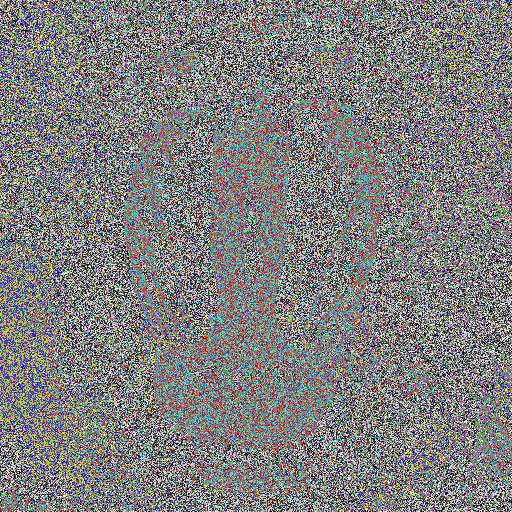

In [7]:
enc = substitution_encryption(img, key)

## Decryption

We can similarly use the `substitution_decryption` function to decrypt our images!

The first step (again) would be to look at the documentation, or the docstring, of `substitution_decryption`. 

In [8]:
?(substitution_decryption)

search: substitution_decryption



```
substitution_decryption(image, keys, path_for_result="./decrypted.png")
```

Performs substitution decryption on a given image with the given keys.

# Algorithm

Iterates simulataneously over each pixel and key, and XORs the pixel value (all R, G, and B) with the given key. Hence, the keys provided must be the same as the ones provided during encryption.

# Arguments

  * `image`: `::String` or `::Array{RGB{N0f8},2}`. The path to the image or the loaded image to be decrypted.
  * `keys::Array{Int64, 1}`: Keys for decryption.
  * `path_for_result::String`: The path for storing the decrypted image.

# Returns

  * `decryptedImage::Array{RGB{N0f8}, 2}`: Decrypted image.

# Example

```julia-repl
julia> substitution_decryption("./encrypted.png", keys)
DECRYPTING
DECRYPTED
```


Reading through the example available in the docstring, we can use the function `substitution_decryption` by passing in the path of the encrypted image and an array of keys.

The function -
- Returns the decrypted image.
- Saves the decrypted image (the filename or the path can be passed as an argument too).

The documentation also says that we can pass an `Array` of type `Array{RGB{N0f8},2}` as an image, which means a loaded image! Let us try this!

DECRYPTING
DECRYPTED


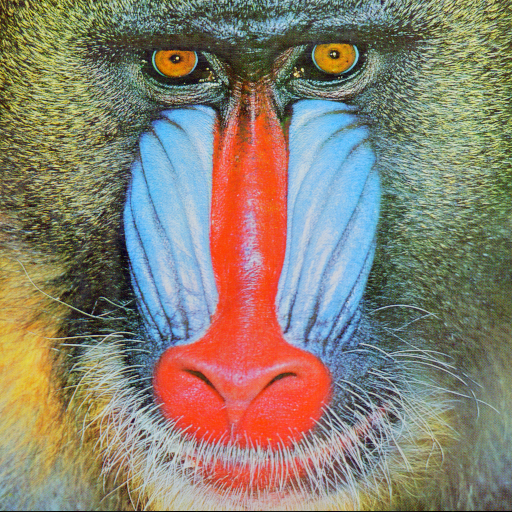

In [9]:
dec = substitution_decryption(enc, key)

There you go, encryption and decryption with a couple of lines!

Don't forget to star [`ChaoticEncryption.jl`](https://saransh-cpp.github.io/ChaoticEncryption.jl) :)

For complete API Documentation, visit - https://saransh-cpp.github.io/ChaoticEncryption.jl